<a href="https://colab.research.google.com/github/akatjizeu/Data-Science/blob/main/deakin-bridging/ML2/ML2_INN_Full_code_Learner_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
    <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>

<center><img src="https://img.freepik.com/free-photo/luxury-bedroom-suite-resort-high-rise-hotel-with-working-table_105762-1783.jpg?w=740&t=st=1654505493~exp=1654506093~hmac=fc1167df2b3797e32400448b458fd80afb85e31403c7689e0b1506023ff754a7" width="720"></center>



<center><font size=6>Hotel Booking Cancellation Prediction</font></center>

## Problem Statement

### Context

Many hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost, which benefits hotel guests. Still, it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.


The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

### Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


### Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing the necessary libraries

In [80]:
#importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import libraries for metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Import librarires for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import libraries for Naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

#import libraries for SVM
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [81]:
# Read the data into a dataframe and view the first 10 rows
df = pd.read_csv('INNHotelsGroup.csv')
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [82]:
# Create a copy of the data so to avoiding editing the original data and view the first 5 rows
hotel = df.copy()

hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Data Overview

* Observations
* Sanity checks

In [83]:
#Display the first and last 5 rows of the dataset
pd.concat([hotel.head(), hotel.tail()])

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [84]:
#Check the columns data types
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* There seems to be no missing values in the data
* There are 19 columns 5 of which are of object type and the rest are numerical

In [85]:
#Print the number of columns and rows
print("The data has {} rows and {} columns".format(hotel.shape[0], hotel.shape[1]))

The data has 36275 rows and 19 columns


In [86]:
#Check the description of the data
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [87]:
#Check the description of object features
hotel.describe(include='object').T

,count,unique,top,freq
Booking_ID,36275,36275,INN36275,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [88]:
#MISSING VALUES

# Calculate missing values information
missing_info = hotel.isnull().agg(['sum', lambda x: (x.sum() / len(x)) * 100])

# Transpose and rename columns
missing_info = missing_info.T.rename(
    columns={'sum': 'Missing Value Count', '': 'Missing Value Percentage'}
)

# Reset index to make 'variable' a column
missing_info = missing_info.reset_index().rename(columns={'index': 'Variable'})

# Display the result
missing_info

,Variable,Missing Value Count,<lambda>
0,Booking_ID,0.0,0.0
1,no_of_adults,0.0,0.0
2,no_of_children,0.0,0.0
3,no_of_weekend_nights,0.0,0.0
4,no_of_week_nights,0.0,0.0
5,type_of_meal_plan,0.0,0.0
6,required_car_parking_space,0.0,0.0
7,room_type_reserved,0.0,0.0
8,lead_time,0.0,0.0
9,arrival_year,0.0,0.0


* There are no missing values in the data

In [89]:
#  It prints the objects unique values and their counts for each column.
for i in hotel.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(hotel[i].value_counts())
    print("*" * 50)

Unique values in Booking_ID are :
Booking_ID
INN36275    1
INN00001    1
INN00002    1
INN00003    1
INN00004    1
           ..
INN00023    1
INN00024    1
INN00025    1
INN00026    1
INN00027    1
Name: count, Length: 36275, dtype: int64
**************************************************
Unique values in type_of_meal_plan are :
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
**************************************************
Unique values in room_type_reserved are :
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
**************************************************
Unique values in market_segment_type are :
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: in

In [90]:
# Check uniqueness of values for each feature
hotel.nunique()

,0
Booking_ID,36275
no_of_adults,5
no_of_children,6
no_of_weekend_nights,8
no_of_week_nights,18
type_of_meal_plan,4
required_car_parking_space,2
room_type_reserved,7
lead_time,352
arrival_year,2


* All object types will be made categorical

In [91]:
#Drop the features, BOOKING_ID, CustomerId and Surname
hotel.drop('Booking_ID', axis=1, inplace=True)

* The Booking_ID column was dropped because it has no significant analytical value in our problem

In [92]:
# Display the data without the Booking_ID column
hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [93]:
#Convert object data types to categorical
hotel['type_of_meal_plan'] = hotel['type_of_meal_plan'].astype('category')
hotel['room_type_reserved'] = hotel['room_type_reserved'].astype('category')
hotel['market_segment_type'] = hotel['market_segment_type'].astype('category')
hotel['booking_status'] = hotel['booking_status'].astype('category')

In [94]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

EDA Questions:
* **What are the busiest months in the hotel?**
  * The busiest month is October, followed by September and then august.
* **Which market segment do most of the guests come from?**
  * Most guests come from the online segment
* **Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**
  * **Aviation:** Prices are fairly consistent and stable, with little variation
  * **Complementary:** Almost all values are near zero, reflecting free or heavily discounted stays
  * **Corporate:** Moderate rates, generally lower than Online and Offline, but higher than Complementary
  * **Offline:** Prices are higher and more spread out, with several extreme outliers
  * **Online:** Rates are also high and widely spread, with many outliers, often higher than Offline
* **What percentage of bookings are canceled?**
  * 32.8% of bookings are cancelled
* Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
* Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

Note: These are a few questions to help guide you in performing EDA. EDA has to be done beyond this set of questions to obtain the maximum point in the corresponding rubric section.

In [95]:
def univariate_analysis_cont(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    ax_box2.set_title(f'Box plot of {feature}') # Add title to boxplot
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.set_title(f'Distribution of {feature}') # Add title to histogram

In [167]:
def univariate_analysis_discrete(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )
    ax.set_title(f'Count Plot of {feature}') # Add title to plot

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
    display(data[feature].value_counts().T)

In [97]:
# A function that takes a dataframe and a categorical variable and displays two appropriate visuals for the variable for EDA
def univariate_analysis_categorical(df, var):
    plt.figure(figsize=(12, 5))

    # Count plot
    #plt.subplot(1, 2, 1)
    ax = sns.countplot(data=df, x=var, palette='viridis')
    plt.title(f'Count Plot of {var}')
    plt.xticks(rotation=45, ha='right')

    # Add count numbers on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

### Univariate Analysis

**Distribution of Average price per room**

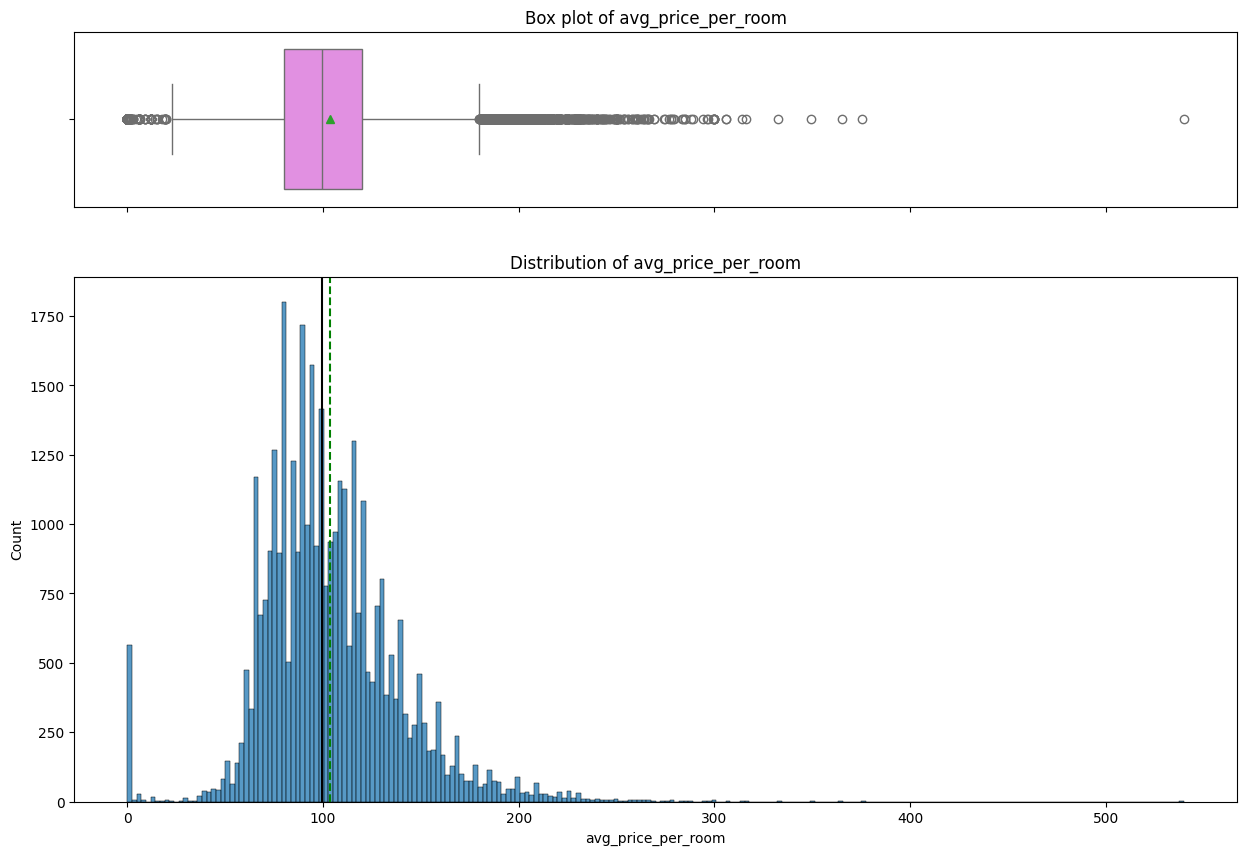

In [138]:
univariate_analysis_cont(hotel, 'avg_price_per_room')

* The variable has outliers and most of them are on the upper end
*

**Distribution of Lead time**

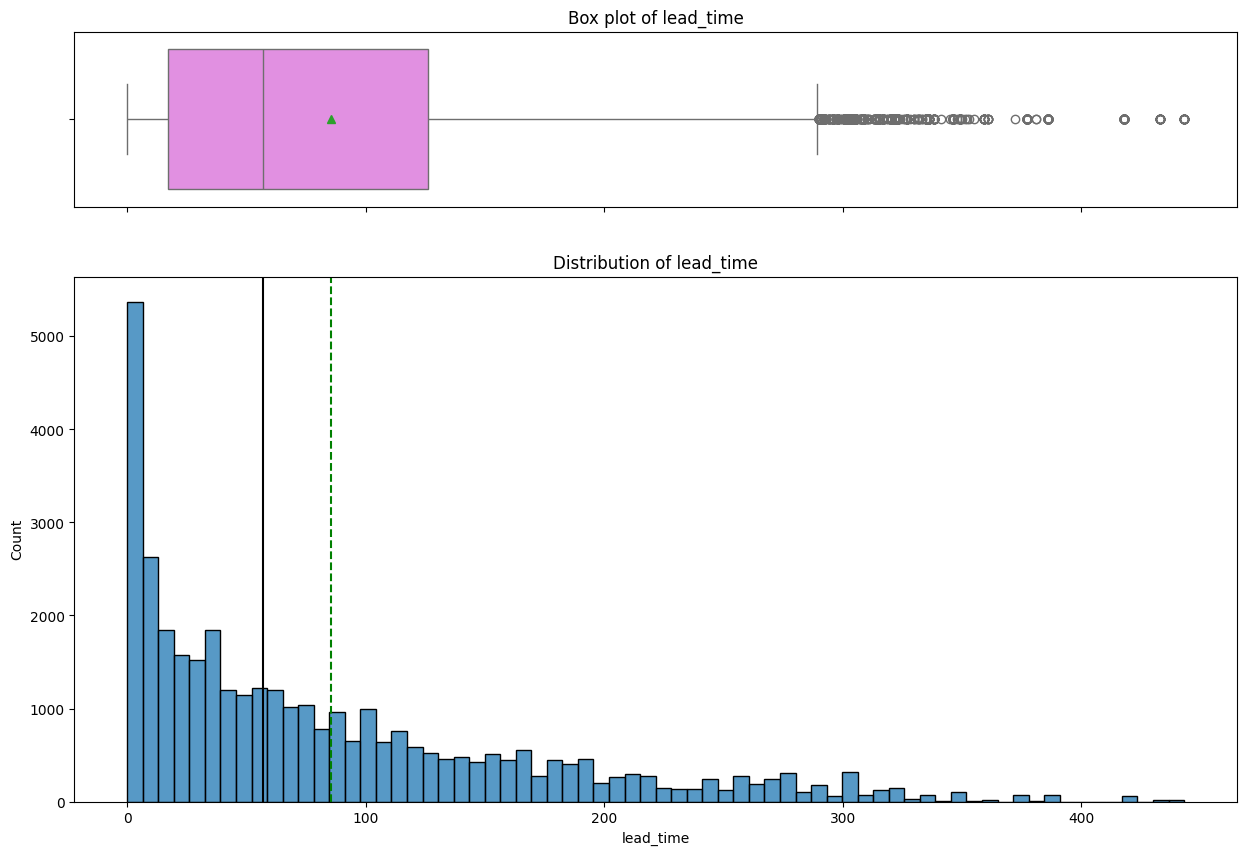

In [139]:
univariate_analysis_cont(hotel, 'lead_time')

* It has outliers on the upper end
* This makes the distribution of the variable right skewed

**No of adults**

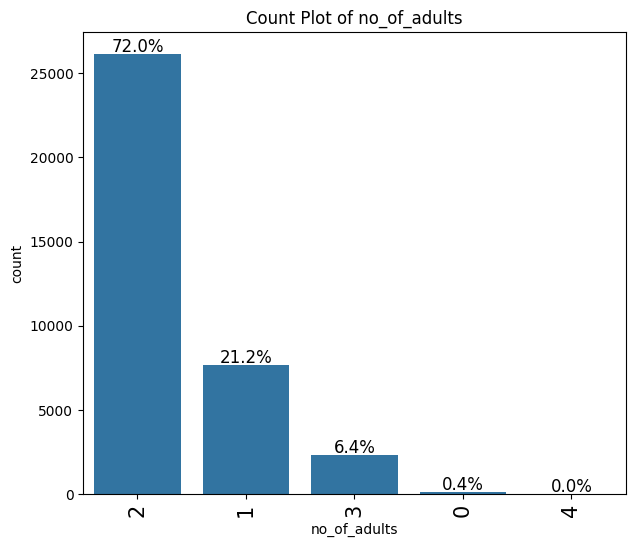

,count
no_of_adults,
2,26108
1,7695
3,2317
0,139
4,16


In [168]:
univariate_analysis_discrete(hotel, 'no_of_adults', perc=True)

* Most reservations made featured two adults which could mean that couples made more reservations or people preferred to share rooms to save costs


**No of children**

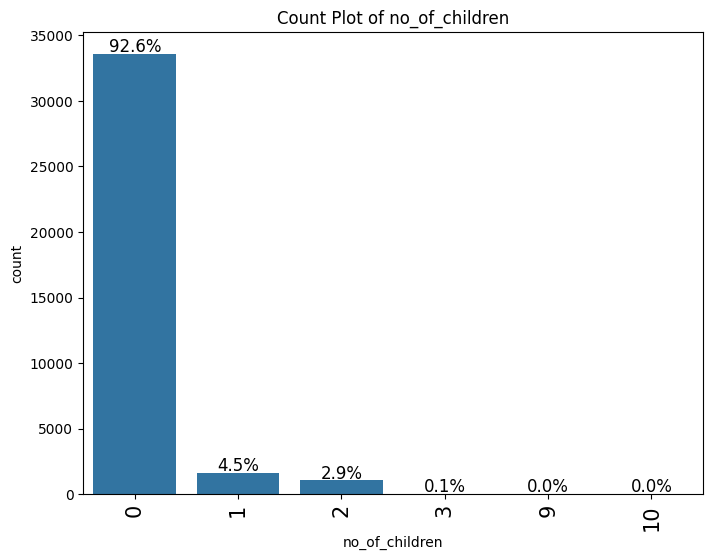

,count
no_of_children,
0,33577
1,1618
2,1058
3,19
9,2
10,1


In [162]:
univariate_analysis_discrete(hotel, 'no_of_children', perc=True)

* More than 92% of the reservations made had 0 children
* Reservations made with 9 and 10 number of children are strange values and we might have to delete the values or change them to 3
* On those reservations that had children most of them had 1 and 2 children


In [170]:
hotel["no_of_children"] = hotel["no_of_children"].replace([9, 10], 3)

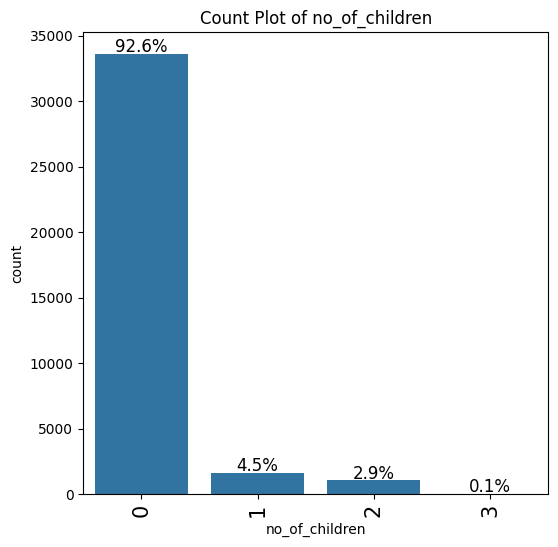

,count
no_of_children,
0,33577
1,1618
2,1058
3,22


In [171]:
univariate_analysis_discrete(hotel, 'no_of_children', perc=True)

**No of weekend nights**

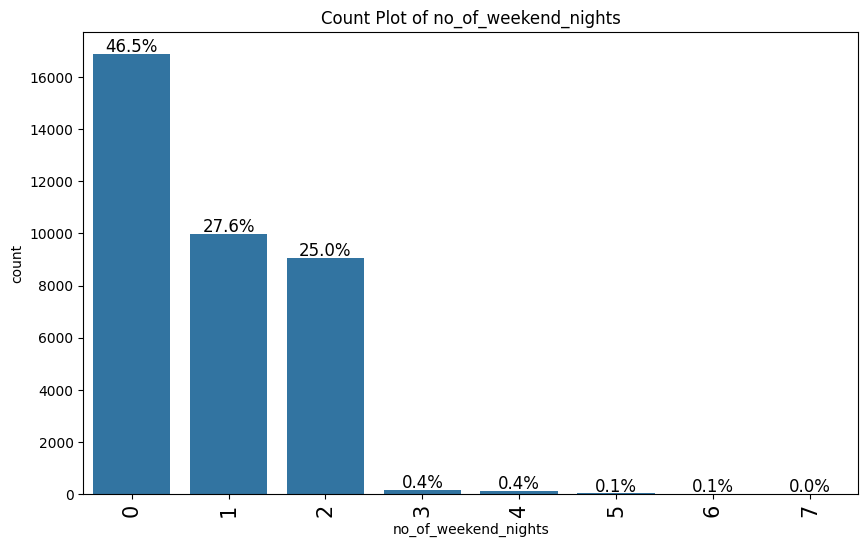

,count
no_of_weekend_nights,
0,16872
1,9995
2,9071
3,153
4,129
5,34
6,20
7,1


In [163]:
univariate_analysis_discrete(hotel, 'no_of_weekend_nights', perc=True)

* Most of the reservations were not made during the weekend
* Those that had weekend nights most had 1 weekend night, then 2 weekend nights and 7 weekend nights had the least reservations

**No fo week nights**

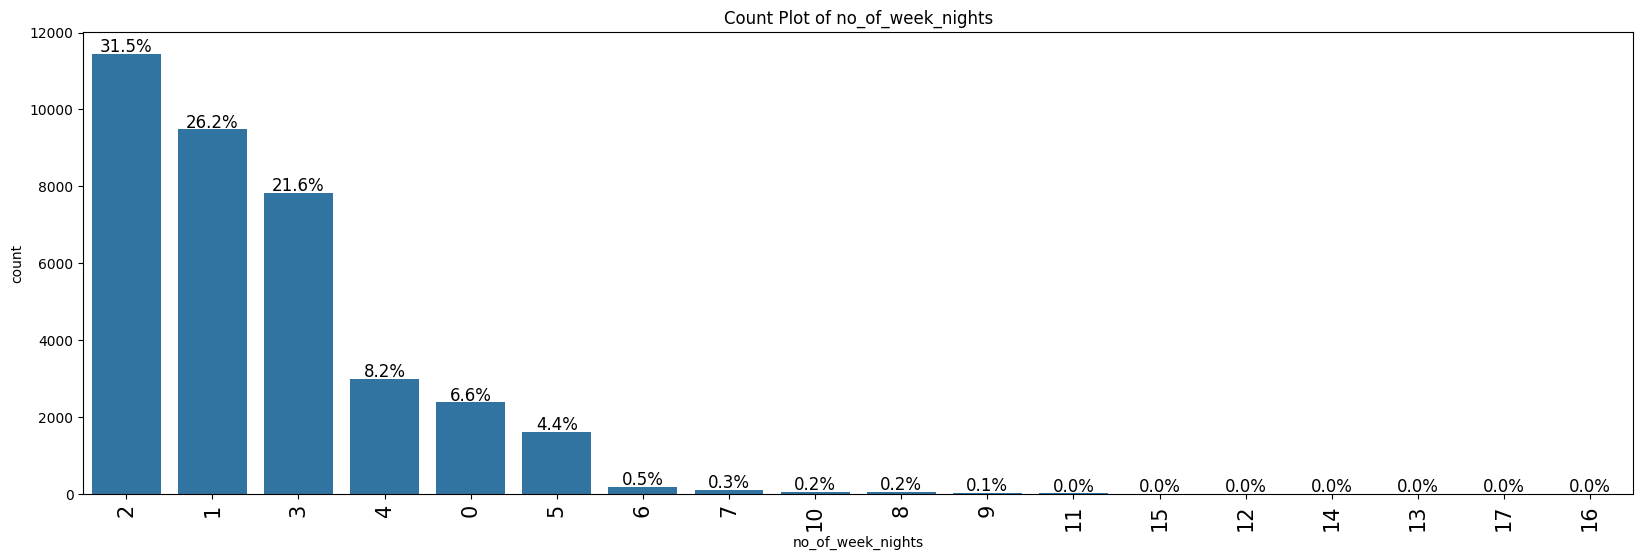

,count
no_of_week_nights,
2,11444
1,9488
3,7839
4,2990
0,2387
5,1614
6,189
7,113
10,62


In [143]:
univariate_analysis_discrete(hotel, 'no_of_week_nights', perc=True)

* Most reservations were made with 2, 1 and 3 week nights in that order as the top 3
* Some reservations had 0 week days reserved, which meant they were entirely weekend reservations

**Type of meal plan**

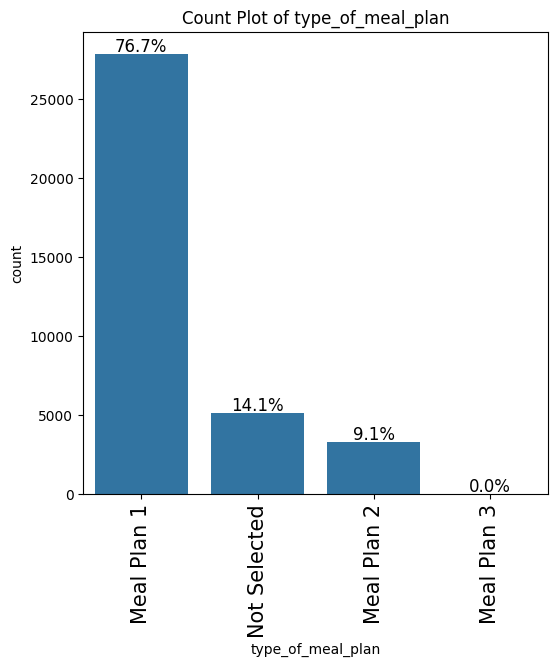

,count
type_of_meal_plan,
Meal Plan 1,27835
Not Selected,5130
Meal Plan 2,3305
Meal Plan 3,5


In [144]:
univariate_analysis_discrete(hotel, 'type_of_meal_plan', perc=True)

* Most customers prefer meal plan 1
* A good number of clients did not select the type of meal plan
* Meal plan 3 is the least preffered

**Required car parking space**

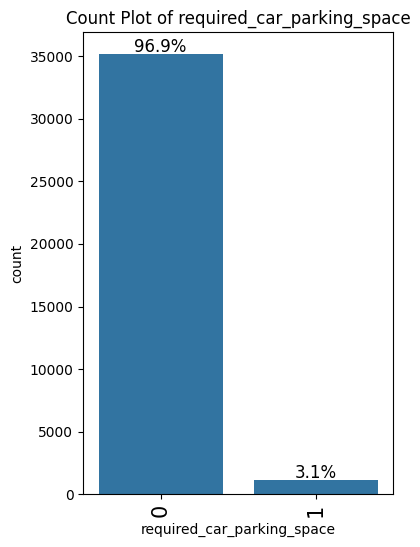

,count
required_car_parking_space,
0,35151
1,1124


In [145]:
univariate_analysis_discrete(hotel, 'required_car_parking_space', perc=True)

* More than 96% of the reservations did not require car parking space

**Room type reserved**

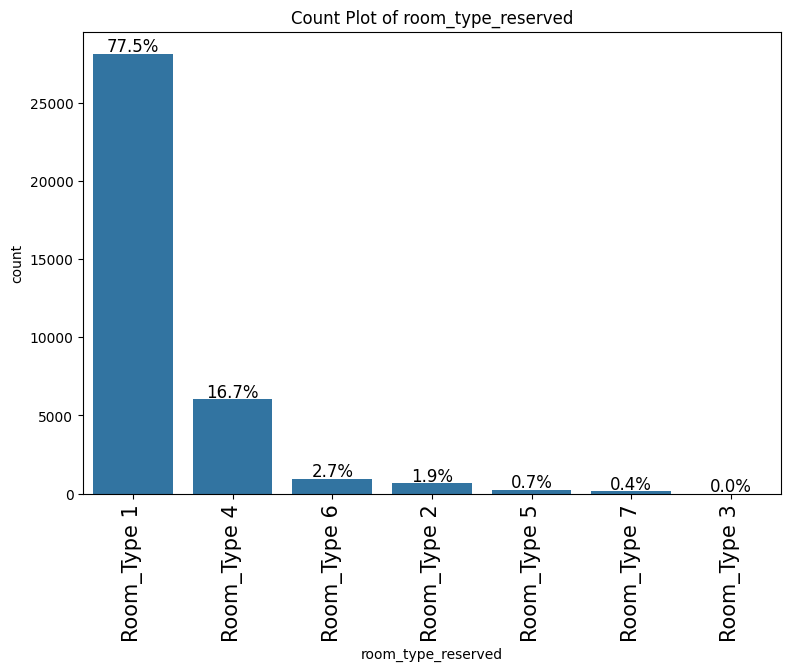

,count
room_type_reserved,
Room_Type 1,28130
Room_Type 4,6057
Room_Type 6,966
Room_Type 2,692
Room_Type 5,265
Room_Type 7,158
Room_Type 3,7


In [146]:
univariate_analysis_discrete(hotel, 'room_type_reserved', perc=True)

* Room type 1 is the most prevalent with most reservations made to the hotel
* Room type 3 is the least prefered in all reservations

**Arrival year**

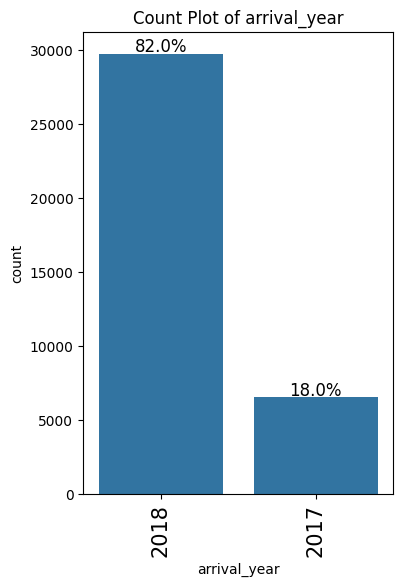

,count
arrival_year,
2018,29761
2017,6514


In [147]:
univariate_analysis_discrete(hotel, 'arrival_year', perc=True)

* According to this data most arrivals were in the year 2018

**Arrival month**

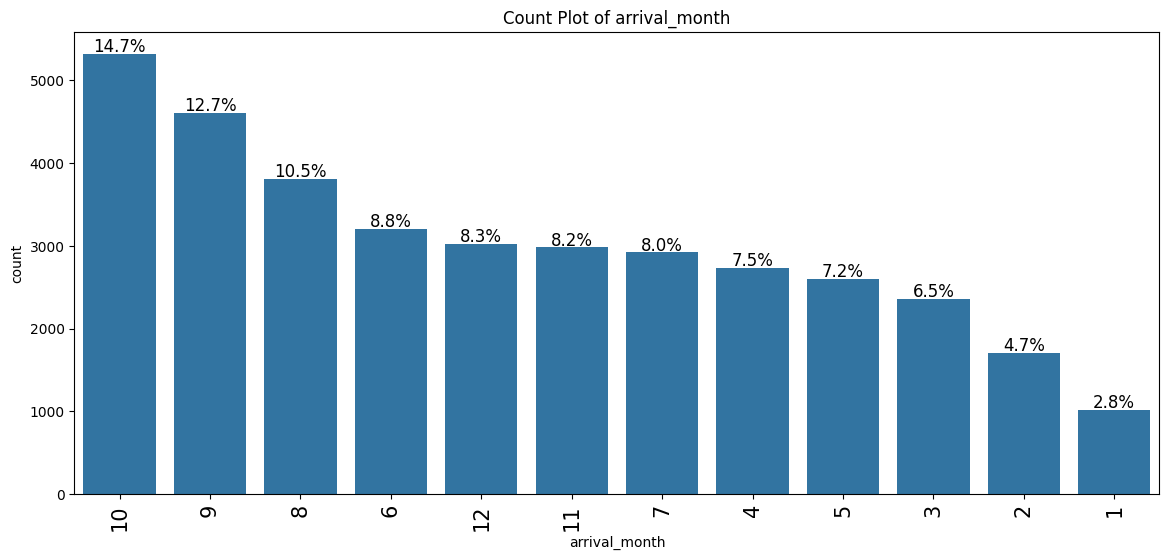

,count
arrival_month,
10,5317
9,4611
8,3813
6,3203
12,3021
11,2980
7,2920
4,2736
5,2598


In [148]:
univariate_analysis_discrete(hotel, 'arrival_month', perc=True)

* The least arrivals were made in January
* The busiest months are October, September and August in that order from the busiest

**Arrival date(day)**

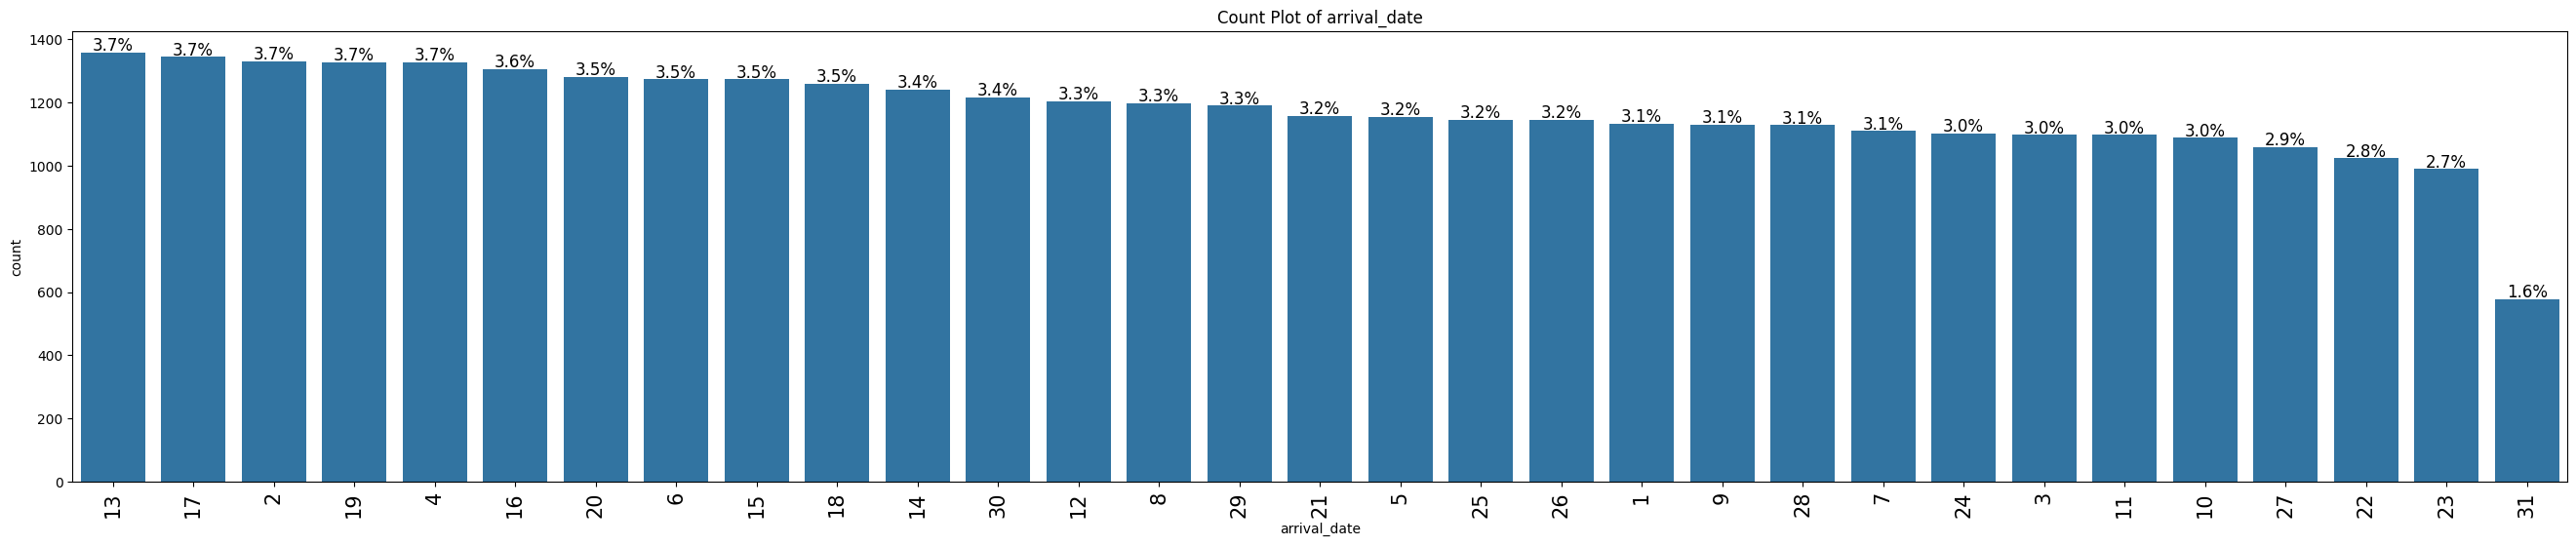

,count
arrival_date,
13,1358
17,1345
2,1331
19,1327
4,1327
16,1306
20,1281
6,1273
15,1273


In [149]:
univariate_analysis_discrete(hotel, 'arrival_date', perc=True)

* The 13th is the most prevalent day of months that the arrivals for the reservations were made
* Generally the arrival date (date of the month) is similar on all the days of the month
* The 31st is the day with the least number of arrivals

**Markert segment type**

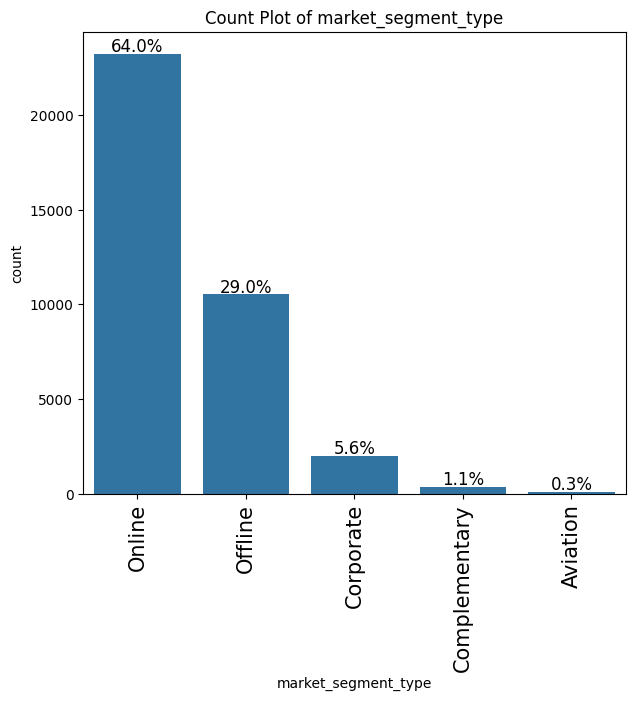

,count
market_segment_type,
Online,23214
Offline,10528
Corporate,2017
Complementary,391
Aviation,125


In [150]:
univariate_analysis_discrete(hotel, 'market_segment_type', perc=True)

* Most customers come from the online segment more than the rest of the segment types

**Repeated guest**

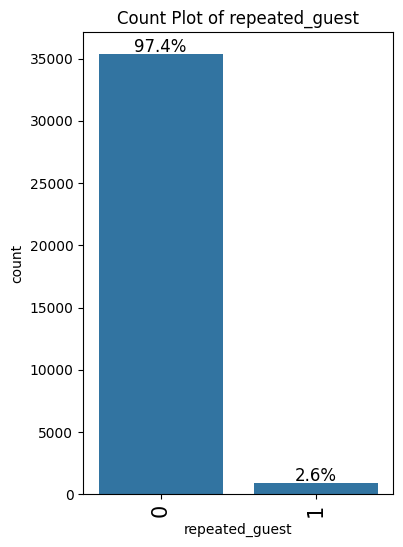

,count
repeated_guest,
0,35345
1,930


In [151]:
univariate_analysis_discrete(hotel, 'repeated_guest', perc=True)

* More than 97% of the customers who made reservations were non-repeat customers

**No fo previous cancellations**

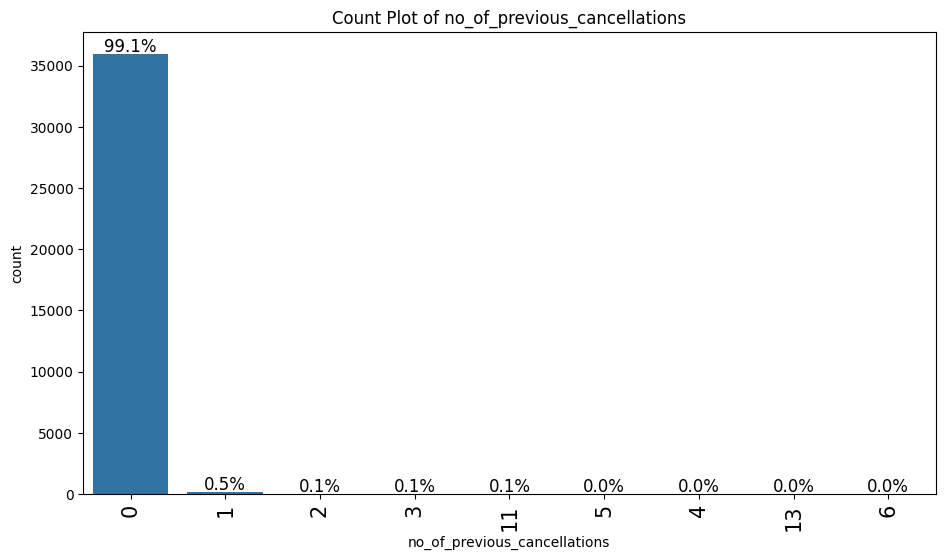

,count
no_of_previous_cancellations,
0,35937
1,198
2,46
3,43
11,25
5,11
4,10
13,4
6,1


In [152]:
univariate_analysis_discrete(hotel, 'no_of_previous_cancellations', perc=True)

* More than 99% of the customers who made reservations had not made any cancellations in the previous reservations

**No of previous bookings not cancelled**

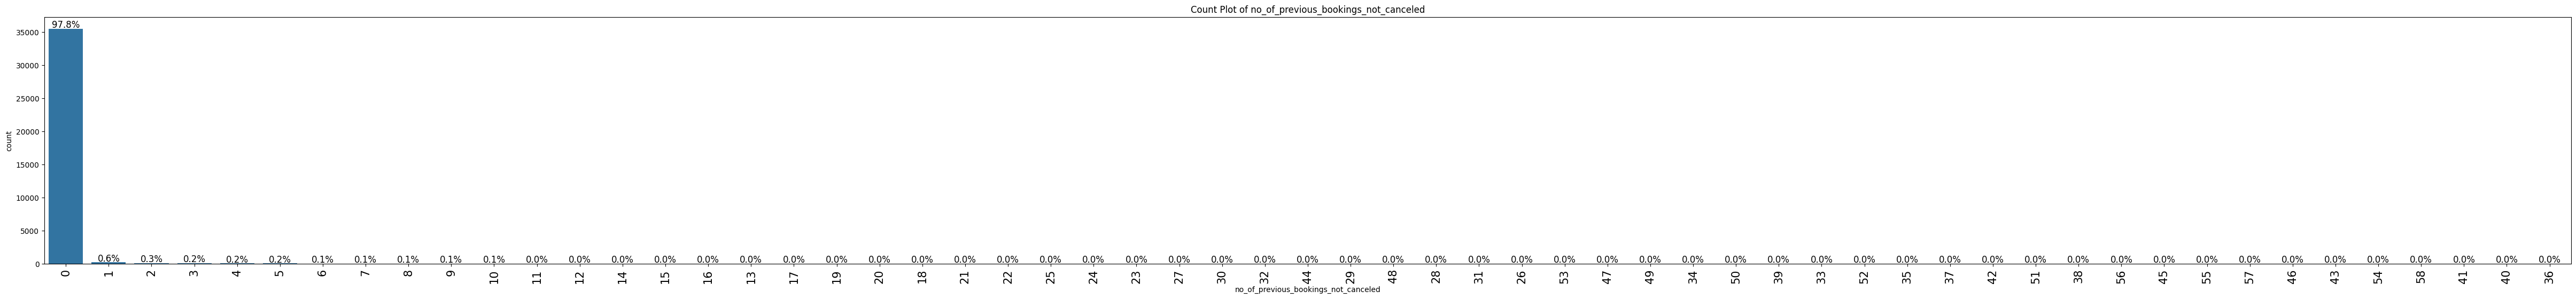

,count
no_of_previous_bookings_not_canceled,
0,35463
1,228
2,112
3,80
4,65
5,60
6,36
7,24
8,23


In [153]:
univariate_analysis_discrete(hotel, 'no_of_previous_bookings_not_canceled', perc=True)

More than 97% of the customers who made reservations have not cancleed any of their previous bookings

**No of special requests**

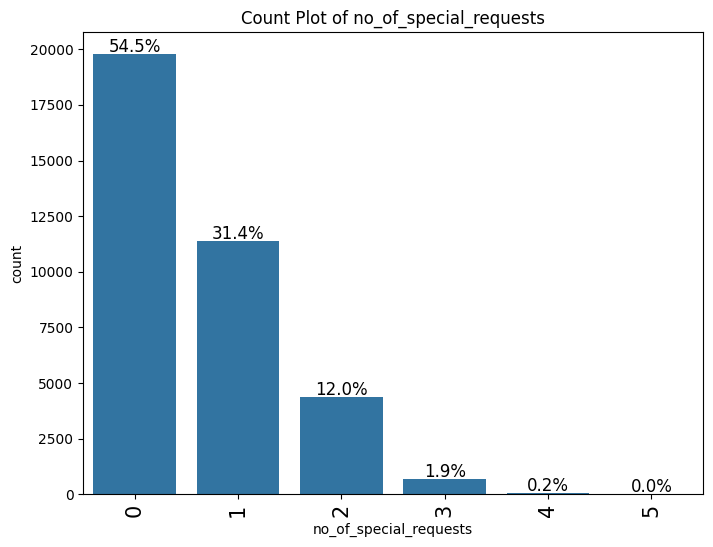

,count
no_of_special_requests,
0,19777
1,11373
2,4364
3,675
4,78
5,8


In [154]:
univariate_analysis_discrete(hotel, 'no_of_special_requests', perc=True)

* More than half of the reservaations made had no special requests
* On those that made requests a lot of them made 1 request

**Booking status**

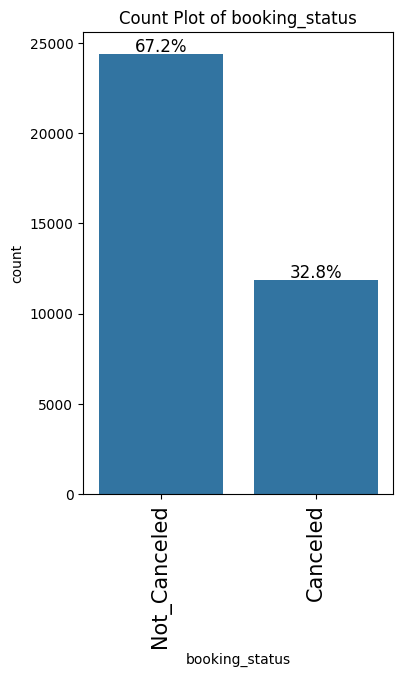

,count
booking_status,
Not_Canceled,24390
Canceled,11885


In [155]:
univariate_analysis_discrete(hotel, 'booking_status', perc=True)

* More than 67% of the booking were not cancelled
* This means our data has imbalanced data for the target variable
* We will have to encode the variable to 0 and 1

In [172]:
# Encoding booking status to 0 and 1
hotel['booking_status'] = hotel["booking_status"].apply(lambda x: 0 if x =='Not_Canceled' else 1)

In [176]:
hotel['booking_status'].value_counts()

,count
booking_status,
0,24390
1,11885


In [179]:
#Convert booking status to int64
hotel['booking_status'] = hotel['booking_status'].astype('int64')

### Bivariate Analysis

In [120]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    # Add title to the plot
    plt.title(f'Stacked Bar Plot of {predictor} by {target}')
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [122]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of " + predictor + " for " + target + "=" + str(target_uniq[0])) # Add title
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of " + predictor + " for " + target + "=" + str(target_uniq[1])) # Add title
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot of " + predictor + " w.r.t " + target) # Add title
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) of " + predictor + " w.r.t " + target) # Add title
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

**correlation**

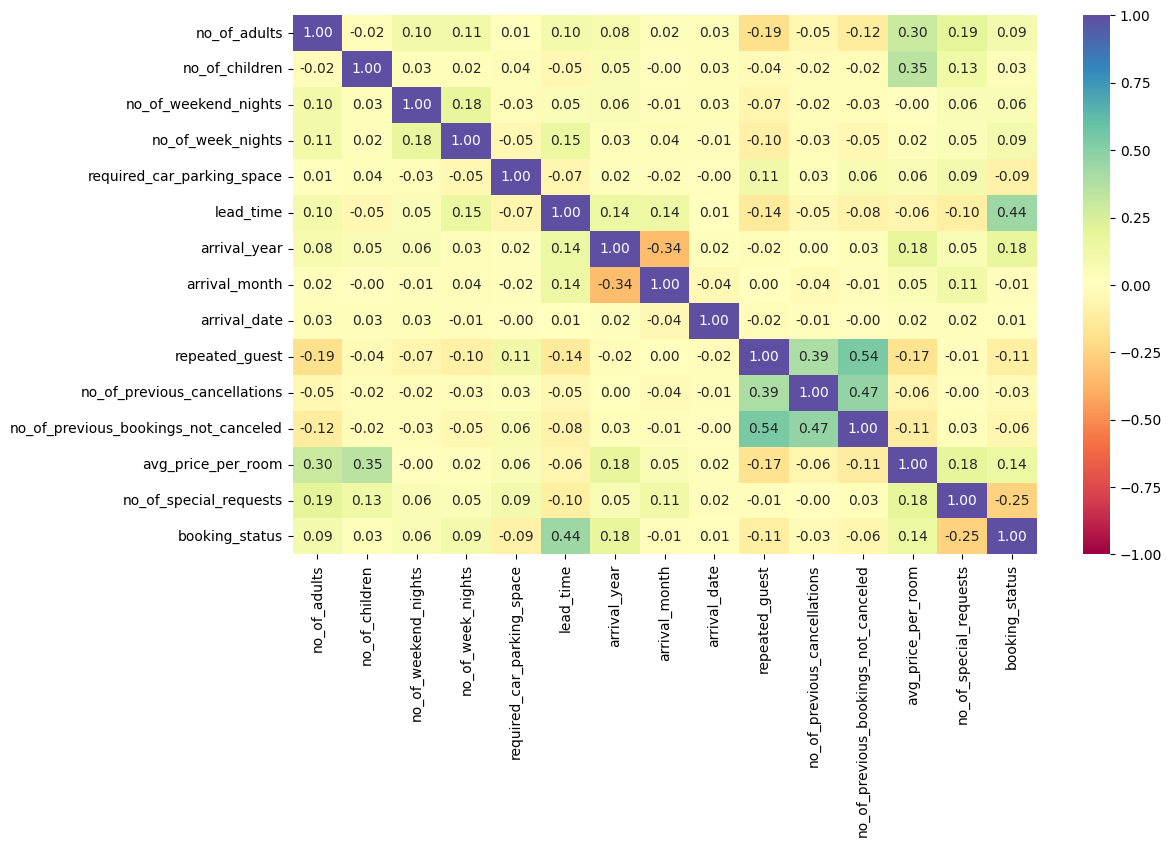

In [180]:
# Correlation of the numerical values
numeric_vars = hotel.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    hotel[numeric_vars].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


**Lead time vs booking status**

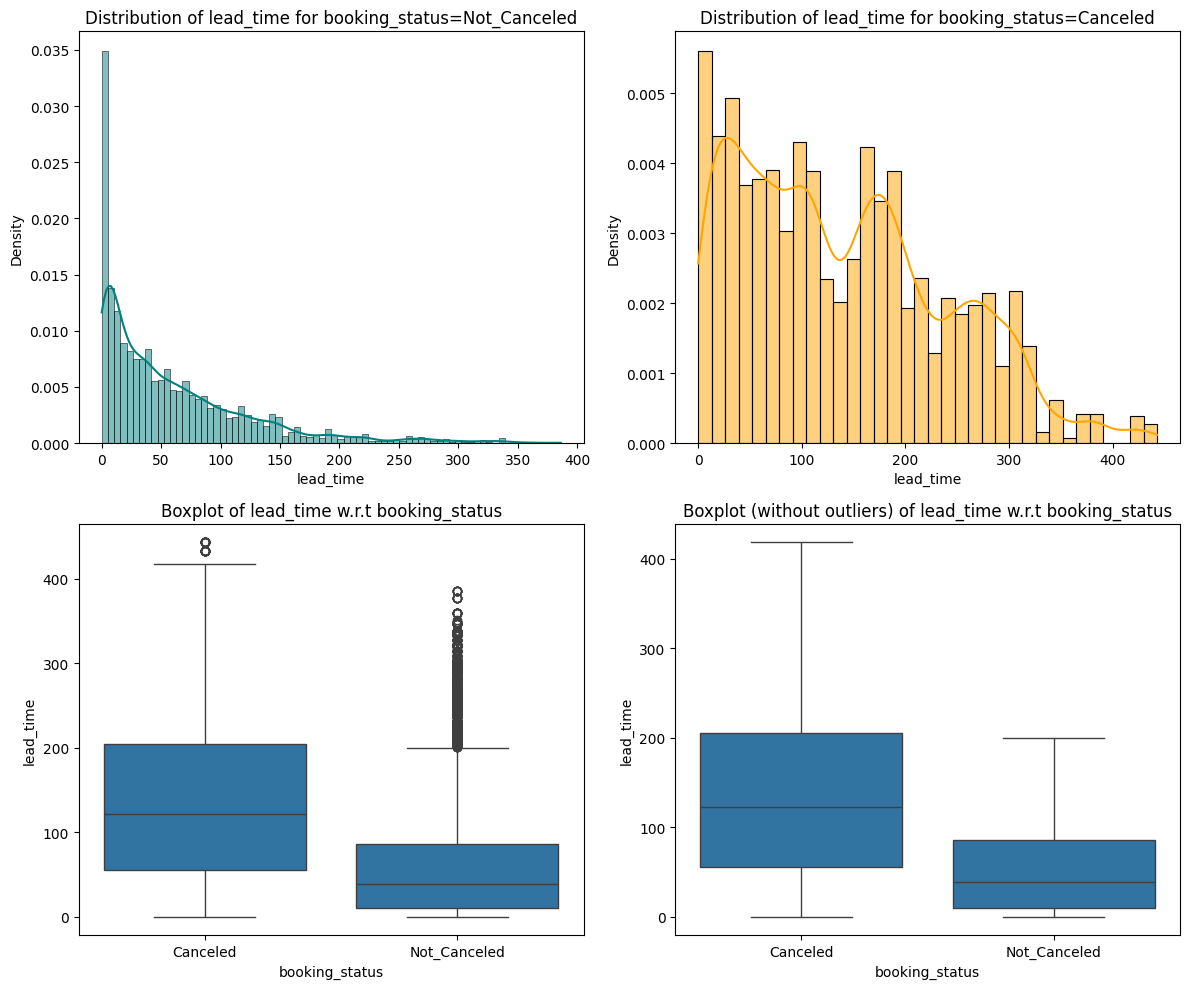

In [125]:
distribution_plot_wrt_target(hotel, 'lead_time', 'booking_status')

**Average price per room vs booking status**

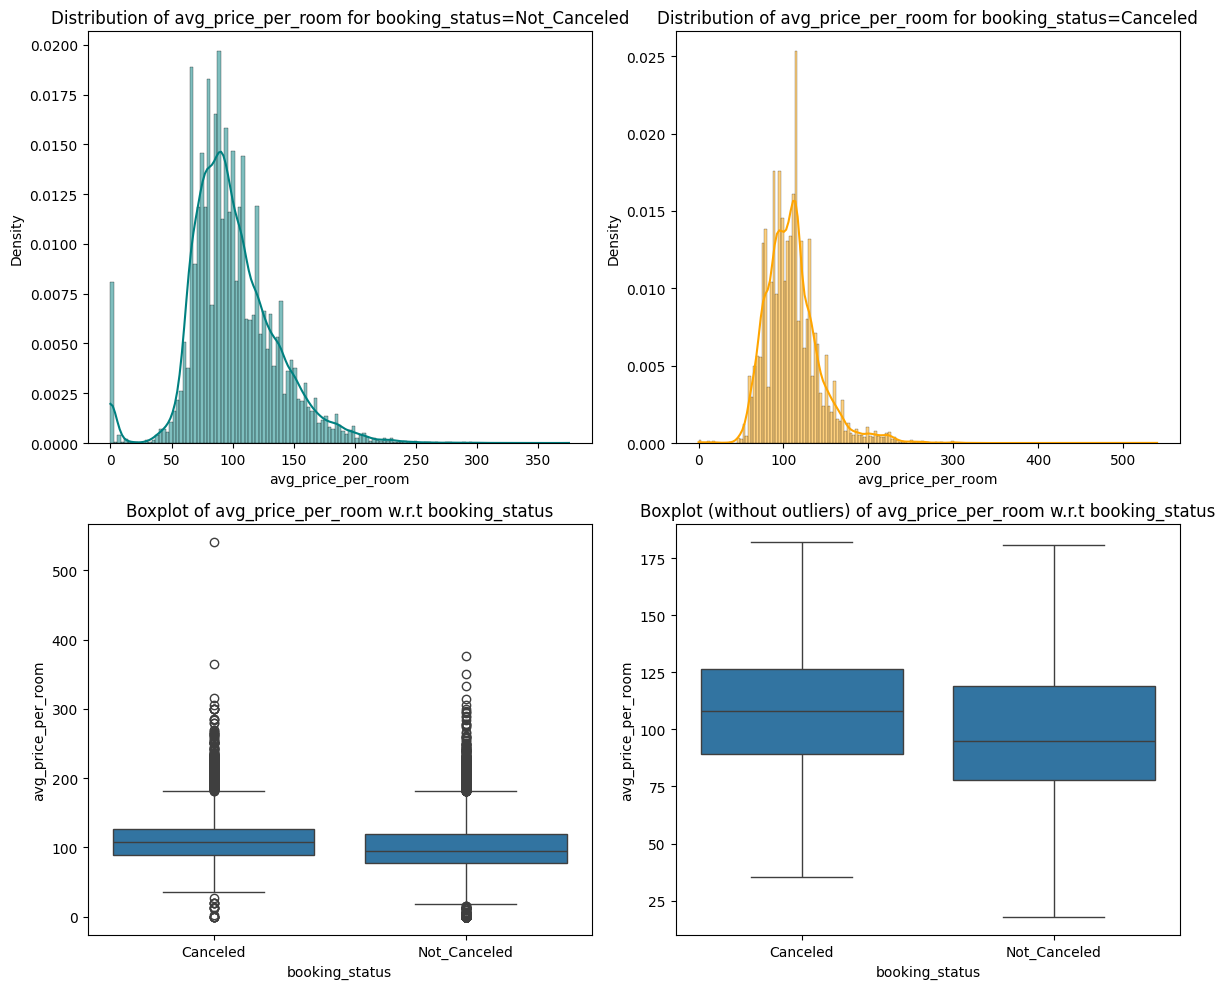

In [126]:
distribution_plot_wrt_target(hotel, 'avg_price_per_room', 'booking_status')

**Average room prices vs markets**

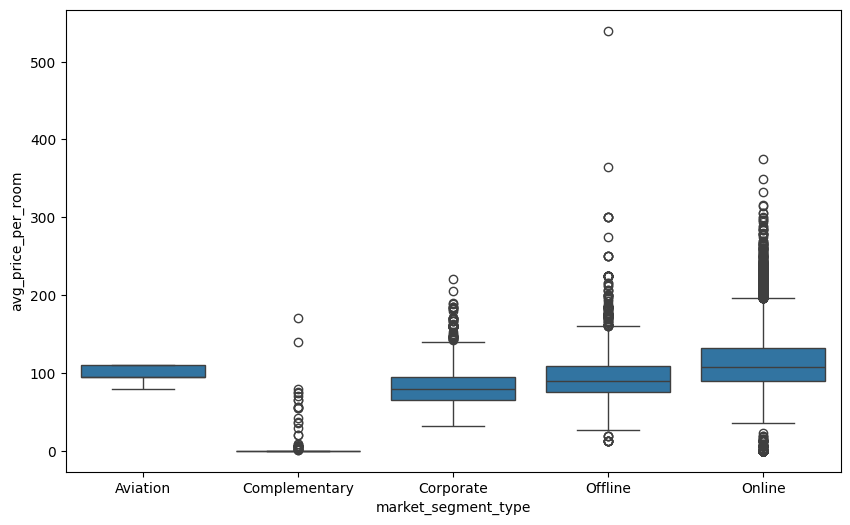

In [129]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=hotel, x="market_segment_type", y="avg_price_per_room"
)
plt.show()

* **Aviation:** Prices are fairly consistent and stable, with little variation
* **Complementary:** Almost all values are near zero, reflecting free or heavily discounted stays
* **Corporate:** Moderate rates, generally lower than Online/Offline, but higher than Complementary
* **Offline:** Prices are higher and more spread out, with several extreme outliers
* **Online:** Rates are also high and widely spread, with many outliers, often higher than Offline

**no_of_special_requests vs avg_price_per_room**

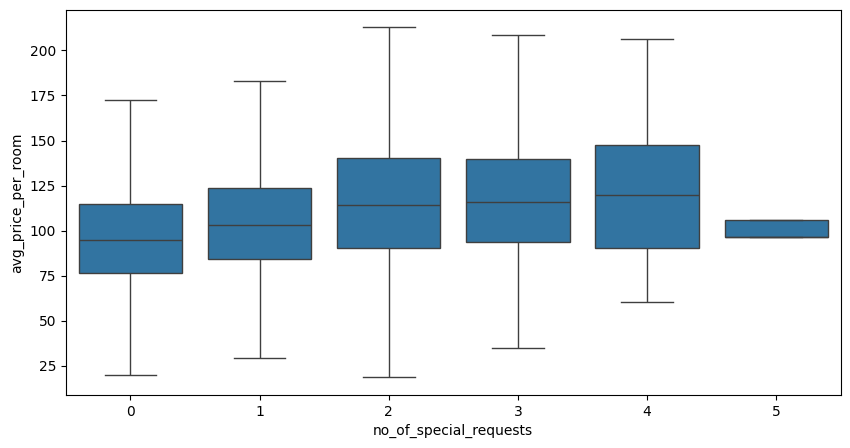

In [130]:
## A boxplot between no_of_special_requests and avg_price_per_room.
plt.figure(figsize=(10, 5))

sns.boxplot(
    data=hotel,
    x="no_of_special_requests",
    y="avg_price_per_room",
    showfliers=False,  # turning off the outliers
)
plt.show()

**Repeating guest vs booking status**

**Busisest months in the hotel**

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## Model Building

### Model Evaluation Criterion

### K-Nearest Neighbor

###Naive Bayes

### Support Vector Machine

## Model Performance Improvement

Tune the models built in the Model Building section

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Recommendations

### Insights

### Business Recommendations